In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# Read Excel file
df = pd.read_excel("Data.xlsx")

# Separate inputs and outputs
X = df.iloc[:, 0:5]   
Y = df.iloc[:, 5:7]   


In [3]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separate training and test data (80/20)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.7860,2.3626,1.4877,0.9671,0.0081,0.0042,0.0480
et,Extra Trees Regressor,1.0894,5.2288,2.1982,0.9306,0.0119,0.0059,0.0880
catboost,CatBoost Regressor,1.2236,7.9914,2.5814,0.9274,0.0140,0.0067,0.3220
br,Bayesian Ridge,1.6972,6.9593,2.5415,0.9238,0.0140,0.0092,0.0180
ridge,Ridge Regression,1.6500,7.0005,2.5457,0.9226,0.0141,0.0090,0.0180
lr,Linear Regression,1.6471,7.0130,2.5480,0.9224,0.0141,0.0090,0.0180
lar,Least Angle Regression,1.6471,7.0130,2.5480,0.9224,0.0141,0.0090,0.0200
en,Elastic Net,1.9240,7.5117,2.6541,0.9211,0.0145,0.0104,0.0180
llar,Lasso Least Angle Regression,2.0441,8.0248,2.7426,0.9159,0.0149,0.0111,0.0180
lasso,Lasso Regression,2.0441,8.0248,2.7426,0.9159,0.0149,0.0111,0.0300


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.3480,0.1725,0.4154,0.9983,0.0022,0.0019


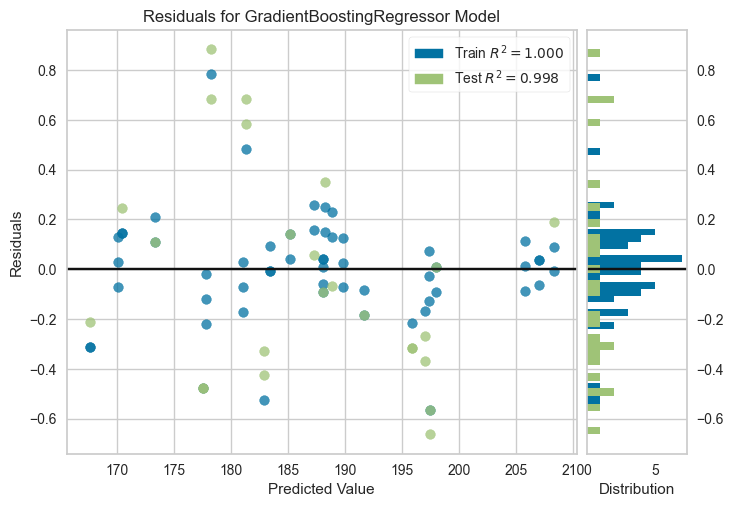

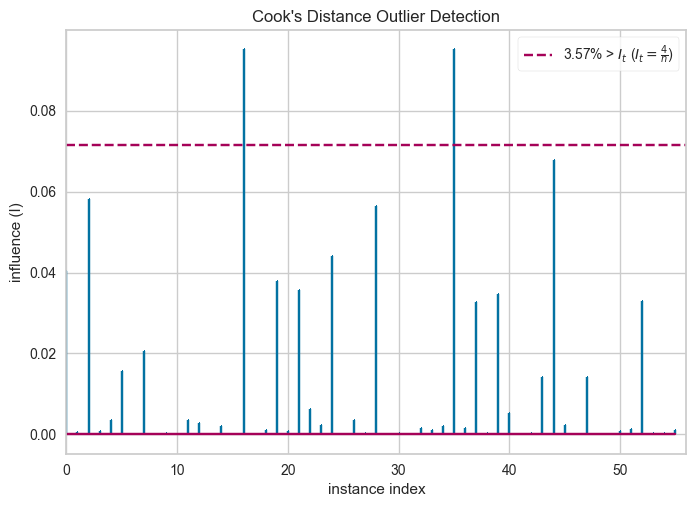

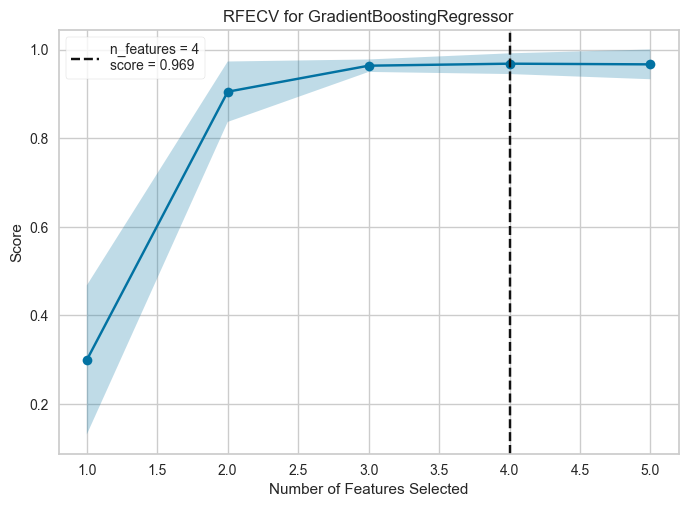

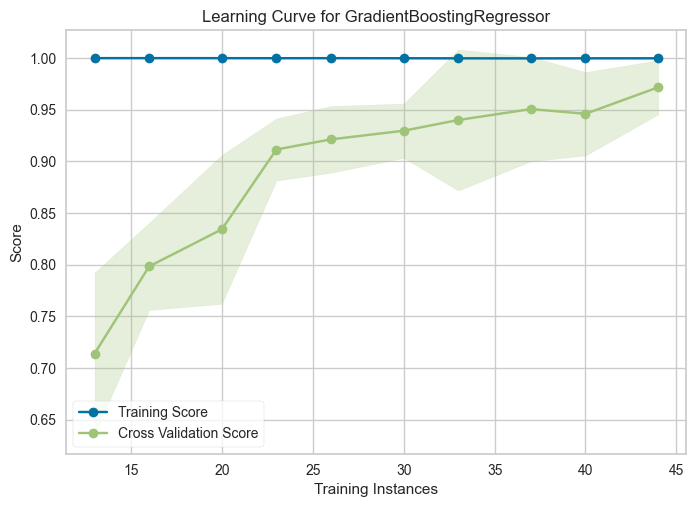

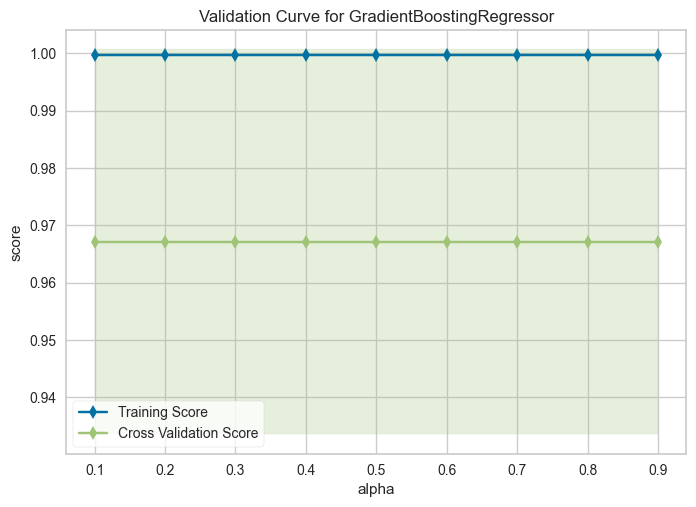

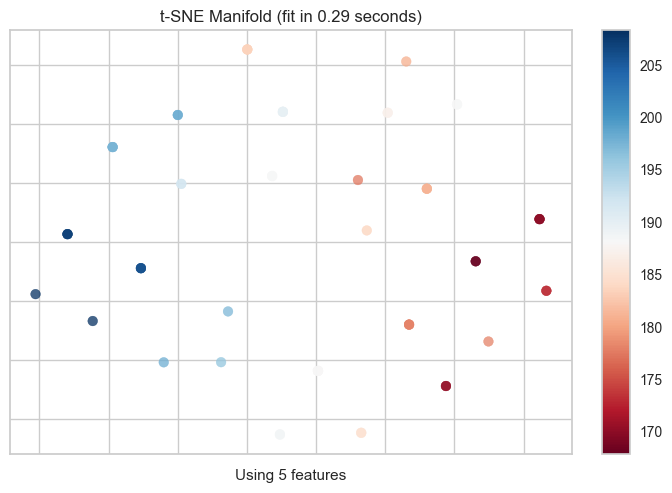

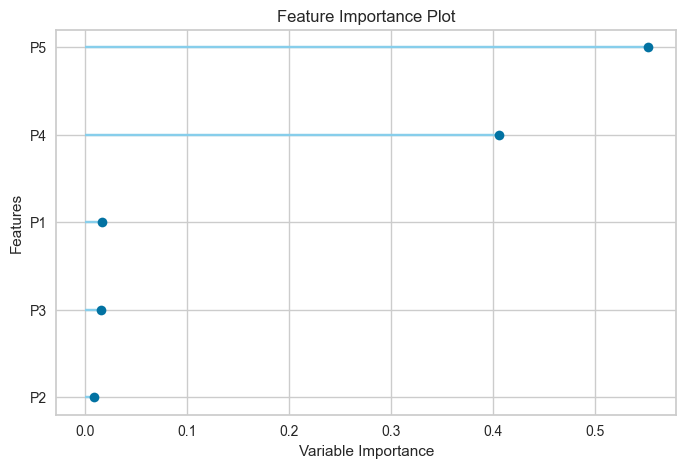

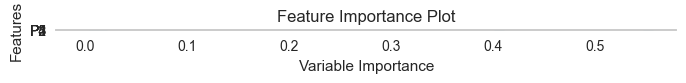

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,squared_error
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [8]:
#pycaret
from pycaret.regression import *

# Create the dataset for Output 1
df1 = pd.concat([X, Y.iloc[:, [0]]], axis=1)

# AutoML Setup
reg1 = setup(
    data=df1,
    target=Y.columns[0],
    session_id=42,
    use_gpu=False,
    fold=5,
    verbose=False,
    n_jobs=-1
)

best_model_1 = compare_models(sort='R2', n_select=1, turbo=True)
results_df = pull()
# PyCaret test verisi ayırmıştı
predictions1 = predict_model(best_model_1)

with pd.ExcelWriter("model_results_output_1.xlsx", engine="openpyxl") as writer:
    results_df.to_excel(writer, sheet_name="Model_Comparison", index=False)
    predictions1.to_excel(writer, sheet_name="Predictions", index=False)


from pycaret.regression import plot_model

# 1. (Residuals)
plot_model(best_model_1, plot='residuals')

# 2.  (Prediction Error)
plot_model(best_model_1, plot='error', save=True)

# 3. Cooks Distance
plot_model(best_model_1, plot='cooks')

# 4. Recursive Feature Elimination 
plot_model(best_model_1, plot='rfe')

# 5. Learning Curve 
plot_model(best_model_1, plot='learning')

# 6. Validation Curve 
plot_model(best_model_1, plot='vc')

# 7. Manifold Learning 
plot_model(best_model_1, plot='manifold')

# 8. Top 10 important features
plot_model(best_model_1, plot='feature')

# 9. Importance of all features
plot_model(best_model_1, plot='feature_all')

# 10. Model hyperparameters
plot_model(best_model_1, plot='parameter')

evaluate_model(best_model_1)


In [7]:
df2 = pd.concat([X, Y.iloc[:, [1]]], axis=1)

reg2 = setup(
    data=df2,
    target=Y.columns[1],
    session_id=42,
    use_gpu=False,
    fold=5,
    verbose=False,
    n_jobs=-1
)

best_model_2 = compare_models(sort='R2', n_select=1, turbo=True)
results_df = pull()

predictions2 = predict_model(best_model_2)

with pd.ExcelWriter("model_results_output_2.xlsx", engine="openpyxl") as writer:
    results_df.to_excel(writer, sheet_name="Model_Comparison", index=False)
    predictions2.to_excel(writer, sheet_name="Predictions", index=False)

from pycaret.regression import plot_model

# 1. (Residuals)
evaluate_model(best_model_2)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.0948,0.0179,0.1284,0.9907,0.0094,0.0072,0.0260
et,Extra Trees Regressor,0.0995,0.0251,0.1426,0.9874,0.0101,0.0074,0.0900
dt,Decision Tree Regressor,0.1081,0.0276,0.1551,0.9843,0.0113,0.0082,0.0140
gbr,Gradient Boosting Regressor,0.1182,0.0294,0.1611,0.9807,0.0113,0.0087,0.0460
rf,Random Forest Regressor,0.1439,0.0409,0.1927,0.9796,0.0139,0.0109,0.0820
ada,AdaBoost Regressor,0.2112,0.0751,0.2721,0.9593,0.0191,0.0156,0.0660
catboost,CatBoost Regressor,0.1817,0.1466,0.3105,0.9404,0.0235,0.0147,0.3720
omp,Orthogonal Matching Pursuit,1.2199,2.1284,1.4279,0.0097,0.1009,0.0925,0.0140
knn,K Neighbors Regressor,1.0530,2.0106,1.3900,0.0046,0.0992,0.0805,0.0200
lasso,Lasso Regression,1.2679,2.2931,1.4820,-0.0375,0.1045,0.0963,0.0120


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.0641,0.0064,0.0798,0.9980,0.0057,0.0048


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…